In [1]:
import random
import numpy 
from importlib import reload
import matplotlib.pyplot as plt
import networkx as nx
import statistics as stat

In [3]:
# to import the file 
fb = nx.read_edgelist('data/sample-ch2017.txt')
fb2 = nx.read_edgelist('data/sample-ch2018.txt')

#Printing some basic info about the graph
print (nx.info(fb))
print (nx.info(fb2))

Name: 
Type: Graph
Number of nodes: 31135
Number of edges: 642287
Average degree:  41.2582
Name: 
Type: Graph
Number of nodes: 26276
Number of edges: 672589
Average degree:  51.1942


###### Change the name from fb to fb2 to get the data for the year 2018

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 22

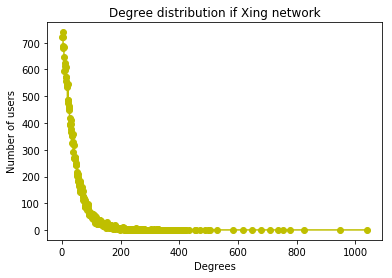

In [5]:
# DEGREES

#Get the degree of each node
# print(nx.degree(fb)) : works but lot of output thus commented

# to get the list of degrees that the connections have (only the value no mention of nodes)
degrees = [val for (node, val) in fb.degree()]
#print(degrees) #: works but lot of output thus commented

# mentions the set of degrees only once
#print(set(degrees))
#print(list(set(degrees))) # converts it into a list format

# how many nodes have the degree 3? Thus get degree distribution Exhibits power law degree distribution --few ppl have many contacts
def deg_dist(fb):
    all_degrees = [val for (node, val) in fb.degree()]
    unique_degrees = list(set(all_degrees)) 
    
    count_of_degrees = []
    for i in unique_degrees:
        x = all_degrees.count(i)
        count_of_degrees.append(x)
    
    plt.plot(unique_degrees, count_of_degrees, 'yo-')
    #plt.loglog(unique_degrees, count_of_degrees, 'yo-')
    plt.xlabel('Degrees')
    plt.ylabel('Number of users')
    plt.title('Degree distribution if Xing network')
    plt.show()

deg_dist(fb)

In [14]:
# median 
stat.median(list(degrees))

37.0

In [8]:
# density of graph
print('Density of our graph is: ', nx.density(fb)) # toooooo low -- highly sparse

# clusteering co-eff of network
print ('average clustering: ', nx.average_clustering(fb)) # not at all knit together

Density of our graph is:  0.0013251814148282548
average clustering:  0.13034080799317344


In [7]:
# Diameter : Maximum shortest path available
print('Dia', nx.diameter(fb))

KeyboardInterrupt: 

In [9]:
# Local bridges : using discovery time and low value algorithm 
lb = list(nx.local_bridges(fb , with_span = False))

#print('Local bridges', lb)
print('Number of Local bridges', len(list(nx.local_bridges(fb, with_span = False))))

Number of Local bridges 96038


In [13]:
# number of triads already existing
tria = nx.triangles(fb)
#print((tria))
print(sum(tria.values()))
print('no of triangle: no overlap', sum(tria.values())/3)

1552312.0


In [30]:
# To create a list of nodes that belong to local node. from [('a','b'), ('c','b')] to ['a','b','c','b']
new_lb = []
for tup in lb:
    for element in tup:
        new_lb.append(element)
        
#nd is to remove duplicates
nd = list(set(new_lb))

# sorted(nd, key = int) arranges the list in ascending order
#print('Nodes that are a part of local bridges:', sorted(nd, key = int) ,"\n","\n")

print ('Number of nodes that are a part of local bridges that are formed are:',len(nd))


Number of nodes that are a part of local bridges that are formed are: 30013


In [32]:
# Bridges
bridge = list(nx.bridges(fb))
print(len(bridge))

0


In [14]:
# the fraction of all possible triangles present in Graph.
print (nx.transitivity(fb))

0.07974776140230994
